In [87]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
from util_func import *
from PIL import Image
import PIL
import os
from collections import Counter


In [88]:
img = cv.imread("tsrd-train/000_0001.png")
show_img("original", img)
file_list = os.listdir("tsrd-train")
images = [file for file in file_list if file.endswith('.png')]

In [3]:
!pip install imagehash

  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)


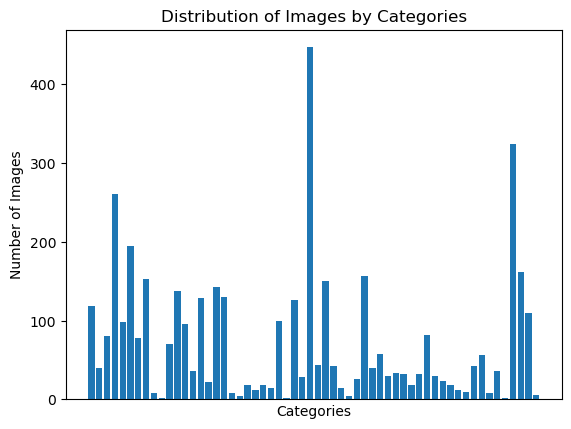

<Figure size 200x200 with 0 Axes>

In [89]:
#show that the classes are imbalance
import matplotlib.pyplot as plt

labels = [image_name.split('_')[0] for image_name in images]
label_counts = Counter(labels)

# Create a histogram
plt.bar(label_counts.keys(), label_counts.values())
plt.xticks([])
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Categories')
plt.figure(figsize=(2,2))
plt.show()


In [90]:
# Data cleaning

from PIL import Image
import imagehash
store = [] # Store hash number
cleared_list = [] # Find out the hash number that is not duplicated
duplicated = [] # find out the duplicated index
cleared_index = [] # find out the non-duplicated index


for i in range (len(images)):
    hash_num = imagehash.average_hash(Image.open("tsrd-train/" + str(images[i])))
    store.append(str(hash_num))

for i, item in enumerate(store):
    if item not in cleared_list:
        cleared_list.append(item)
    else:
        duplicated.append(i)

for i in range (len(store)):
    if i in duplicated:
        continue
    else:
        cleared_index.append(images[i])

print("duplicated", duplicated)
print(len(duplicated))
print("cleared", cleared_index)
print(len(cleared_index))


duplicated [49, 51, 52, 53, 54, 55, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 286, 301, 312, 319, 366, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 4

In [91]:
# Store the non-duplicated images in the folder

import os
from shutil import copyfile

# Create the output folder if it doesn't exist
output_folder = 'cleared_folder/'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Specify the source folder containing the original images
source_folder = 'tsrd-train/'

# Iterate through the cleared_index list and copy the corresponding images to the output folder
for image_name in cleared_index:
    source_path = os.path.join(source_folder, image_name)
    target_path = os.path.join(output_folder, image_name)
    
    # Copy the image from the source folder to the output folder
    copyfile(source_path, target_path)

print("Images have been copied to 'cleared_folder' folder.")

Images have been copied to 'cleared_folder' folder.


In [92]:
#histogram equalization

def equalize_image(img):
    # Equalization
    eq = cv.equalizeHist(img)
    # CLAHE
    clahe = cv.createCLAHE(clipLimit=3, tileGridSize=(8, 8))
    dst = clahe.apply(img)
    return eq, dst

# Directory containing the images
source_folder = 'cleared_folder/'
image_dir = source_folder

output_folder = "equalized_dataset/"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process each image in the list
for filename in cleared_index:
    # Read the image
    img_path = os.path.join(image_dir, filename)
    img = cv.imread(img_path, 0)

    if img is not None:
        # Equalize the image
        eq_img , clahe_img = equalize_image(img)

        # You can save the processed images if needed
        cv.imwrite(os.path.join(output_folder, f"{filename}"), eq_img)
        # cv.imwrite(os.path.join(output_folder, f"clahe_{filename}"), clahe_img)
        
print("Finished Equalized")

Finished Equalized


In [93]:
# Counter to count each amount of data in each category

from collections import Counter

cumsum = 0
total_over,total_below=0,0

overlist, belowlist = [], []
within_total,outside_total=0,0

# Function to extract the first part before the first underscore
def get_prefix(s):
    return s.split('_')[0]

# Count the frequency of the first parts
frequency_counter = Counter(get_prefix(filename) for filename in cleared_index)

print(frequency_counter)

average = round(sum(frequency_counter.values())/56)
print(average)
for key, count in frequency_counter.items():
    print(f"{key}: {count}")

    cumsum += count

    if count > 40:
        overlist.append(key)
        total_over+=1

    elif count < 20:
        belowlist.append(key)
        total_below+=1

print("which image over the count: ",total_over) #20
print("which image below the count: ",total_below) #38

print("\nTotal images: ", cumsum)
#print(belowlist)
print(frequency_counter["000"])
print(overlist)

Counter({'003': 125, '054': 110, '005': 96, '035': 74, '007': 71, '028': 68, '055': 66, '017': 65, '026': 63, '014': 62, '056': 55, '000': 52, '024': 50, '004': 49, '016': 47, '002': 40, '006': 39, '043': 33, '030': 32, '011': 31, '037': 29, '029': 21, '031': 21, '049': 21, '001': 20, '013': 18, '036': 17, '040': 16, '042': 16, '010': 15, '038': 15, '039': 15, '044': 14, '027': 13, '034': 13, '045': 12, '052': 12, '012': 11, '015': 11, '050': 10, '020': 9, '022': 9, '041': 9, '046': 9, '023': 7, '032': 7, '021': 6, '018': 4, '048': 4, '051': 4, '008': 3, '047': 3, '057': 3, '019': 2, '033': 2, '009': 1, '025': 1, '053': 1})
29
000: 52
001: 20
002: 40
003: 125
004: 49
005: 96
006: 39
007: 71
008: 3
009: 1
010: 15
011: 31
012: 11
013: 18
014: 62
015: 11
016: 47
017: 65
018: 4
019: 2
020: 9
021: 6
022: 9
023: 7
024: 50
025: 1
026: 63
027: 13
028: 68
029: 21
030: 32
031: 21
032: 7
033: 2
034: 13
035: 74
036: 17
037: 29
038: 15
039: 15
040: 16
041: 9
042: 16
043: 33
044: 14
045: 12
046: 9
0

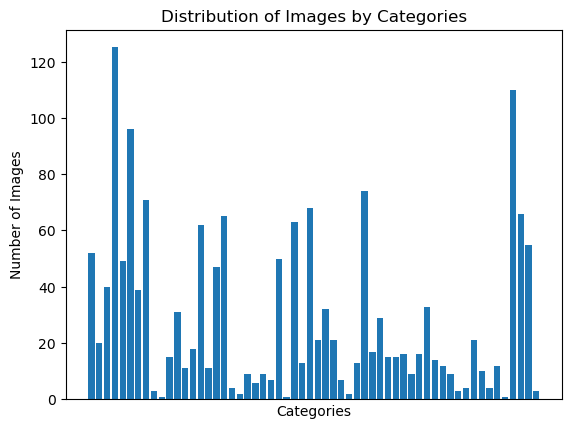

<Figure size 200x200 with 0 Axes>

In [95]:
#show that the classes are imbalance

import matplotlib.pyplot as plt

labels = [image_name.split('_')[0] for image_name in cleared_index]
label_counts = Counter(labels)


# Create a histogram
plt.bar(label_counts.keys(), label_counts.values())
plt.xticks([])
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Categories')
plt.figure(figsize=(2,2))
plt.show()


In [96]:
resize_width = 64
resize_height = 64

In [97]:
def resize_img():
    input_folder = 'equalized_dataset/'

    if not os.path.exists(input_folder):
        os.makedirs(input_folder)
    
    resize_width = 64
    resize_height = 64

    for filename in os.listdir(input_folder):
        if filename.endswith(('.png')):
            image_path = os.path.join(input_folder, filename)
            image = cv.imread(image_path)

            resized_image = cv.resize(image, (resize_width, resize_height))

            cv.imwrite((image_path), resized_image)


resize_img()
print("All images has been resized.")

All images has been resized.


In [98]:
## Data augmentation

import random

## To produce different angle, brightness, scale of image
## increasing training sets.

def random_pic_generator(img, angle = 10, w = 64, h = 64):
    
    yc, xc = h // 2, w // 2
    angle = random.randint(-angle, angle)
    scale_range =  random.randint(70, 130)
    scale = scale_range / 100
    M = cv.getRotationMatrix2D((xc, yc), angle, scale)
    dst = cv.warpAffine(img, M, (w, h))

    gamma_no = random.randint(5, 30)
    gamma = gamma_no / 10
    lookUpTable = np.empty((1,256), dtype = np.uint8)
    for i in range(256):
        lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0 ,255)
    res = cv.LUT(dst, lookUpTable)
    
    return(res)



In [99]:
#data augmentation (add images)

import os
import random
import cv2 as cv
from collections import Counter

# Define the show_img function to display images
def show_img(img, title="Image"):
    cv.imshow(title, img)
    cv.waitKey(0)
    cv.destroyAllWindows()

# Function to perform image augmentation (in this case, flipping)
def augment_image(img):
    flipped_img = cv.flip(img, 1)
    return flipped_img


cumsum = 0
total_over, total_below = 0, 0
overlist, belowlist = [], []

# Function to extract the first part before the first underscore
def get_prefix(s):
    return s.split('_')[0]

# Count the frequency of the first parts
frequency_counter = Counter(get_prefix(filename) for filename in cleared_index)


for key, count in frequency_counter.items():
    cumsum += count

    if count < 55:
        total_below += 1
        belowlist.append(key)
        
difference = {}
for i in belowlist:
    minus = 55 - (frequency_counter[i])
    difference[i]=minus      
print(difference)

# Directory to save augmented images (replace with your actual directory)
output_dir = "path_to_output_directory"
os.makedirs(output_dir, exist_ok=True)

input_dir = "equalized_dataset"

# List all files in the directory
all_files = os.listdir(input_dir)


# Augment classes with fewer than 55 images and save augmented images
for class_label in belowlist:
    matching_files = [filename for filename in all_files if filename.split("_")[0] == class_label]
    
    if matching_files:
        for i in range(difference[class_label]):  # Use "_" as the loop variable
            # Randomly select one image for augmentation, even if there are more than 20
            random_img_filename = random.choice(matching_files)
            img_path = os.path.join(input_dir, random_img_filename)
            img = cv.imread(img_path)
            unique_name = f"{class_label}_{i}_{random.randint(1, 9999)}" 
            

            if img is not None:
                # Augment the image
                augmented_img = random_pic_generator(img)

                # Construct the output path for the augmented image
                output_filename = f"{unique_name}.jpg"
                output_path = os.path.join(input_dir, output_filename)

                # Save the augmented image
                saved = cv.imwrite((output_path), augmented_img)

                if saved:
                    print(f"Saved augmented image to {output_path}")
                else:
                    print(f"Failed to save augmented image to {output_path}")
            else:
                print(f"Failed to read image at {img_path}")
    else:
        print(f"No matching files found for class label {class_label}.")

folder1 = input_dir
folder2 = output_dir  # Note that folder2 is a relative path

# Join folder1 and folder2
joined_path = os.path.join(folder1, folder2)

# Print the joined path
print(joined_path)

{'000': 3, '001': 35, '002': 15, '004': 6, '006': 16, '008': 52, '009': 54, '010': 40, '011': 24, '012': 44, '013': 37, '015': 44, '016': 8, '018': 51, '019': 53, '020': 46, '021': 49, '022': 46, '023': 48, '024': 5, '025': 54, '027': 42, '029': 34, '030': 23, '031': 34, '032': 48, '033': 53, '034': 42, '036': 38, '037': 26, '038': 40, '039': 40, '040': 39, '041': 46, '042': 39, '043': 22, '044': 41, '045': 43, '046': 46, '047': 52, '048': 51, '049': 34, '050': 45, '051': 51, '052': 43, '053': 54, '057': 52}
Saved augmented image to equalized_dataset\000_0_5721.jpg
Saved augmented image to equalized_dataset\000_1_4827.jpg
Saved augmented image to equalized_dataset\000_2_4745.jpg
Saved augmented image to equalized_dataset\001_0_5074.jpg
Saved augmented image to equalized_dataset\001_1_466.jpg
Saved augmented image to equalized_dataset\001_2_9218.jpg
Saved augmented image to equalized_dataset\001_3_6557.jpg
Saved augmented image to equalized_dataset\001_4_8905.jpg
Saved augmented image t

Saved augmented image to equalized_dataset\009_47_2721.jpg
Saved augmented image to equalized_dataset\009_48_8772.jpg
Saved augmented image to equalized_dataset\009_49_8529.jpg
Saved augmented image to equalized_dataset\009_50_2016.jpg
Saved augmented image to equalized_dataset\009_51_8990.jpg
Saved augmented image to equalized_dataset\009_52_4167.jpg
Saved augmented image to equalized_dataset\009_53_8038.jpg
Saved augmented image to equalized_dataset\010_0_431.jpg
Saved augmented image to equalized_dataset\010_1_6729.jpg
Saved augmented image to equalized_dataset\010_2_6944.jpg
Saved augmented image to equalized_dataset\010_3_2429.jpg
Saved augmented image to equalized_dataset\010_4_6086.jpg
Saved augmented image to equalized_dataset\010_5_6595.jpg
Saved augmented image to equalized_dataset\010_6_4388.jpg
Saved augmented image to equalized_dataset\010_7_5050.jpg
Saved augmented image to equalized_dataset\010_8_6627.jpg
Saved augmented image to equalized_dataset\010_9_1121.jpg
Saved au

Saved augmented image to equalized_dataset\015_26_9848.jpg
Saved augmented image to equalized_dataset\015_27_2199.jpg
Saved augmented image to equalized_dataset\015_28_1965.jpg
Saved augmented image to equalized_dataset\015_29_6950.jpg
Saved augmented image to equalized_dataset\015_30_7062.jpg
Saved augmented image to equalized_dataset\015_31_9424.jpg
Saved augmented image to equalized_dataset\015_32_681.jpg
Saved augmented image to equalized_dataset\015_33_3700.jpg
Saved augmented image to equalized_dataset\015_34_6119.jpg
Saved augmented image to equalized_dataset\015_35_1852.jpg
Saved augmented image to equalized_dataset\015_36_206.jpg
Saved augmented image to equalized_dataset\015_37_3991.jpg
Saved augmented image to equalized_dataset\015_38_4082.jpg
Saved augmented image to equalized_dataset\015_39_889.jpg
Saved augmented image to equalized_dataset\015_40_7821.jpg
Saved augmented image to equalized_dataset\015_41_8073.jpg
Saved augmented image to equalized_dataset\015_42_4957.jpg


Saved augmented image to equalized_dataset\021_1_3895.jpg
Saved augmented image to equalized_dataset\021_2_3592.jpg
Saved augmented image to equalized_dataset\021_3_1698.jpg
Saved augmented image to equalized_dataset\021_4_4500.jpg
Saved augmented image to equalized_dataset\021_5_4104.jpg
Saved augmented image to equalized_dataset\021_6_281.jpg
Saved augmented image to equalized_dataset\021_7_2309.jpg
Saved augmented image to equalized_dataset\021_8_846.jpg
Saved augmented image to equalized_dataset\021_9_2620.jpg
Saved augmented image to equalized_dataset\021_10_5987.jpg
Saved augmented image to equalized_dataset\021_11_4900.jpg
Saved augmented image to equalized_dataset\021_12_3245.jpg
Saved augmented image to equalized_dataset\021_13_688.jpg
Saved augmented image to equalized_dataset\021_14_9029.jpg
Saved augmented image to equalized_dataset\021_15_304.jpg
Saved augmented image to equalized_dataset\021_16_9588.jpg
Saved augmented image to equalized_dataset\021_17_2475.jpg
Saved augm

Saved augmented image to equalized_dataset\025_29_90.jpg
Saved augmented image to equalized_dataset\025_30_9698.jpg
Saved augmented image to equalized_dataset\025_31_6029.jpg
Saved augmented image to equalized_dataset\025_32_8029.jpg
Saved augmented image to equalized_dataset\025_33_2370.jpg
Saved augmented image to equalized_dataset\025_34_279.jpg
Saved augmented image to equalized_dataset\025_35_8514.jpg
Saved augmented image to equalized_dataset\025_36_3562.jpg
Saved augmented image to equalized_dataset\025_37_4747.jpg
Saved augmented image to equalized_dataset\025_38_4002.jpg
Saved augmented image to equalized_dataset\025_39_3813.jpg
Saved augmented image to equalized_dataset\025_40_9581.jpg
Saved augmented image to equalized_dataset\025_41_1953.jpg
Saved augmented image to equalized_dataset\025_42_2763.jpg
Saved augmented image to equalized_dataset\025_43_2613.jpg
Saved augmented image to equalized_dataset\025_44_7649.jpg
Saved augmented image to equalized_dataset\025_45_6803.jpg


Saved augmented image to equalized_dataset\031_23_6588.jpg
Saved augmented image to equalized_dataset\031_24_2804.jpg
Saved augmented image to equalized_dataset\031_25_9520.jpg
Saved augmented image to equalized_dataset\031_26_2846.jpg
Saved augmented image to equalized_dataset\031_27_9604.jpg
Saved augmented image to equalized_dataset\031_28_3116.jpg
Saved augmented image to equalized_dataset\031_29_2251.jpg
Saved augmented image to equalized_dataset\031_30_7366.jpg
Saved augmented image to equalized_dataset\031_31_2533.jpg
Saved augmented image to equalized_dataset\031_32_9194.jpg
Saved augmented image to equalized_dataset\031_33_9358.jpg
Saved augmented image to equalized_dataset\032_0_3650.jpg
Saved augmented image to equalized_dataset\032_1_6778.jpg
Saved augmented image to equalized_dataset\032_2_975.jpg
Saved augmented image to equalized_dataset\032_3_132.jpg
Saved augmented image to equalized_dataset\032_4_8958.jpg
Saved augmented image to equalized_dataset\032_5_7005.jpg
Saved

Saved augmented image to equalized_dataset\036_13_1205.jpg
Saved augmented image to equalized_dataset\036_14_8813.jpg
Saved augmented image to equalized_dataset\036_15_627.jpg
Saved augmented image to equalized_dataset\036_16_6604.jpg
Saved augmented image to equalized_dataset\036_17_9924.jpg
Saved augmented image to equalized_dataset\036_18_7032.jpg
Saved augmented image to equalized_dataset\036_19_8450.jpg
Saved augmented image to equalized_dataset\036_20_7009.jpg
Saved augmented image to equalized_dataset\036_21_2396.jpg
Saved augmented image to equalized_dataset\036_22_6357.jpg
Saved augmented image to equalized_dataset\036_23_1151.jpg
Saved augmented image to equalized_dataset\036_24_9149.jpg
Saved augmented image to equalized_dataset\036_25_2363.jpg
Saved augmented image to equalized_dataset\036_26_1710.jpg
Saved augmented image to equalized_dataset\036_27_8796.jpg
Saved augmented image to equalized_dataset\036_28_4177.jpg
Saved augmented image to equalized_dataset\036_29_2844.jp

Saved augmented image to equalized_dataset\041_2_4724.jpg
Saved augmented image to equalized_dataset\041_3_4269.jpg
Saved augmented image to equalized_dataset\041_4_7288.jpg
Saved augmented image to equalized_dataset\041_5_7569.jpg
Saved augmented image to equalized_dataset\041_6_8126.jpg
Saved augmented image to equalized_dataset\041_7_6078.jpg
Saved augmented image to equalized_dataset\041_8_177.jpg
Saved augmented image to equalized_dataset\041_9_9905.jpg
Saved augmented image to equalized_dataset\041_10_9150.jpg
Saved augmented image to equalized_dataset\041_11_8087.jpg
Saved augmented image to equalized_dataset\041_12_3548.jpg
Saved augmented image to equalized_dataset\041_13_965.jpg
Saved augmented image to equalized_dataset\041_14_2818.jpg
Saved augmented image to equalized_dataset\041_15_110.jpg
Saved augmented image to equalized_dataset\041_16_8068.jpg
Saved augmented image to equalized_dataset\041_17_3661.jpg
Saved augmented image to equalized_dataset\041_18_149.jpg
Saved aug

Saved augmented image to equalized_dataset\045_1_3974.jpg
Saved augmented image to equalized_dataset\045_2_6564.jpg
Saved augmented image to equalized_dataset\045_3_2874.jpg
Saved augmented image to equalized_dataset\045_4_2226.jpg
Saved augmented image to equalized_dataset\045_5_303.jpg
Saved augmented image to equalized_dataset\045_6_900.jpg
Saved augmented image to equalized_dataset\045_7_5762.jpg
Saved augmented image to equalized_dataset\045_8_7244.jpg
Saved augmented image to equalized_dataset\045_9_7793.jpg
Saved augmented image to equalized_dataset\045_10_4584.jpg
Saved augmented image to equalized_dataset\045_11_3812.jpg
Saved augmented image to equalized_dataset\045_12_9171.jpg
Saved augmented image to equalized_dataset\045_13_7233.jpg
Saved augmented image to equalized_dataset\045_14_9143.jpg
Saved augmented image to equalized_dataset\045_15_8945.jpg
Saved augmented image to equalized_dataset\045_16_3478.jpg
Saved augmented image to equalized_dataset\045_17_2925.jpg
Saved au

Saved augmented image to equalized_dataset\048_39_3591.jpg
Saved augmented image to equalized_dataset\048_40_4362.jpg
Saved augmented image to equalized_dataset\048_41_8733.jpg
Saved augmented image to equalized_dataset\048_42_8112.jpg
Saved augmented image to equalized_dataset\048_43_9530.jpg
Saved augmented image to equalized_dataset\048_44_1225.jpg
Saved augmented image to equalized_dataset\048_45_7880.jpg
Saved augmented image to equalized_dataset\048_46_4180.jpg
Saved augmented image to equalized_dataset\048_47_5104.jpg
Saved augmented image to equalized_dataset\048_48_2100.jpg
Saved augmented image to equalized_dataset\048_49_2474.jpg
Saved augmented image to equalized_dataset\048_50_3465.jpg
Saved augmented image to equalized_dataset\049_0_3555.jpg
Saved augmented image to equalized_dataset\049_1_1233.jpg
Saved augmented image to equalized_dataset\049_2_4182.jpg
Saved augmented image to equalized_dataset\049_3_9877.jpg
Saved augmented image to equalized_dataset\049_4_2371.jpg
Sa

Saved augmented image to equalized_dataset\052_17_4087.jpg
Saved augmented image to equalized_dataset\052_18_760.jpg
Saved augmented image to equalized_dataset\052_19_5936.jpg
Saved augmented image to equalized_dataset\052_20_3972.jpg
Saved augmented image to equalized_dataset\052_21_2759.jpg
Saved augmented image to equalized_dataset\052_22_1055.jpg
Saved augmented image to equalized_dataset\052_23_8803.jpg
Saved augmented image to equalized_dataset\052_24_2323.jpg
Saved augmented image to equalized_dataset\052_25_5826.jpg
Saved augmented image to equalized_dataset\052_26_5739.jpg
Saved augmented image to equalized_dataset\052_27_2424.jpg
Saved augmented image to equalized_dataset\052_28_6514.jpg
Saved augmented image to equalized_dataset\052_29_9810.jpg
Saved augmented image to equalized_dataset\052_30_5072.jpg
Saved augmented image to equalized_dataset\052_31_8225.jpg
Saved augmented image to equalized_dataset\052_32_825.jpg
Saved augmented image to equalized_dataset\052_33_1753.jpg

In [100]:
#data augmentation (delete images)

import os
import random
import cv2 as cv
from collections import Counter

# Define the show_img function to display images
def show_img(img, title="Image"):
    cv.imshow(title, img)
    cv.waitKey(0)
    cv.destroyAllWindows()

# Function to perform image augmentation (in this case, flipping)
def augment_image(img):
    flipped_img = cv.flip(img, 1)
    return flipped_img


cumsum = 0
total_over, total_below = 0, 0
overlist, belowlist = [], []

# Function to extract the first part before the first underscore
def get_prefix(s):
    return s.split('_')[0]

# Count the frequency of the first parts
frequency_counter = Counter(get_prefix(filename) for filename in cleared_index)

for key, count in frequency_counter.items():
    cumsum += count

    if count < 55:
        total_below += 1
        belowlist.append(key)
        
    else:
        overlist.append(key)
        

input_dir = "equalized_dataset"

# List all files in the directory
all_files = os.listdir(input_dir)

print(overlist)

for class_label in overlist:
    matching_files = [filename for filename in all_files if filename.split("_")[0] == class_label]
    
    # Define the number of images to delete randomly
    img_in_xtrain = 55
    
    
    num_images_to_delete = len(matching_files) - 55
    
    for _ in range(num_images_to_delete):
        # Randomly pick an image from matching_files
        random_img_filename = random.choice(matching_files)
        img_path = os.path.join(input_dir, random_img_filename)
        print(img_path)
        img = cv.imread(img_path)

        # Delete the image file
        os.remove(img_path)

        # Remove the image filename from all_files list
        all_files.remove(random_img_filename)

        # Update the matching_files list without the deleted image
        matching_files.remove(random_img_filename)

print("Deletion process completed.")





['003', '005', '007', '014', '017', '026', '028', '035', '054', '055', '056']
equalized_dataset\003_0112.png
equalized_dataset\003_0124.png
equalized_dataset\003_0025.png
equalized_dataset\003_0018.png
equalized_dataset\003_0072.png
equalized_dataset\003_0034.png
equalized_dataset\003_0116.png
equalized_dataset\003_0096.png
equalized_dataset\003_0041.png
equalized_dataset\003_0045.png
equalized_dataset\003_0123.png
equalized_dataset\003_0057.png
equalized_dataset\003_0060.png
equalized_dataset\003_0032.png
equalized_dataset\003_0007.png
equalized_dataset\003_0054.png
equalized_dataset\003_0079.png
equalized_dataset\003_0016.png
equalized_dataset\003_0100.png
equalized_dataset\003_0028.png
equalized_dataset\003_0105.png
equalized_dataset\003_0106.png
equalized_dataset\003_0044.png
equalized_dataset\003_0062.png
equalized_dataset\003_0043.png
equalized_dataset\003_0035.png
equalized_dataset\003_0122.png
equalized_dataset\003_0121.png
equalized_dataset\003_0033.png
equalized_dataset\003_0

In [101]:
'''UnexistCat = ['019', '020'] # the unexist dataset in testing, proved at first model.

input_dir = "equalized_dataset"
all_files = os.listdir(input_dir)

for class_label in UnexistCat:
    matching_files = [filename for filename in all_files if filename.split("_")[0] == class_label]
    for image in matching_files:
        print(image)
        img_path = os.path.join(input_dir, image)
        os.remove(img_path)
        # matching_files.remove(random_img_filename)
    
print("Deletion process completed.")'''

'UnexistCat = [\'019\', \'020\'] # the unexist dataset in testing, proved at first model.\n\ninput_dir = "equalized_dataset"\nall_files = os.listdir(input_dir)\n\nfor class_label in UnexistCat:\n    matching_files = [filename for filename in all_files if filename.split("_")[0] == class_label]\n    for image in matching_files:\n        print(image)\n        img_path = os.path.join(input_dir, image)\n        os.remove(img_path)\n        # matching_files.remove(random_img_filename)\n    \nprint("Deletion process completed.")'

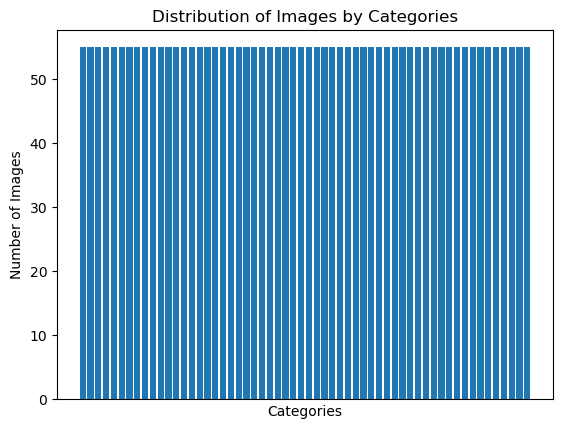

<Figure size 200x200 with 0 Axes>

Label: 000, Count: 55
Label: 001, Count: 55
Label: 002, Count: 55
Label: 003, Count: 55
Label: 004, Count: 55
Label: 005, Count: 55
Label: 006, Count: 55
Label: 007, Count: 55
Label: 008, Count: 55
Label: 009, Count: 55
Label: 010, Count: 55
Label: 011, Count: 55
Label: 012, Count: 55
Label: 013, Count: 55
Label: 014, Count: 55
Label: 015, Count: 55
Label: 016, Count: 55
Label: 017, Count: 55
Label: 018, Count: 55
Label: 019, Count: 55
Label: 020, Count: 55
Label: 021, Count: 55
Label: 022, Count: 55
Label: 023, Count: 55
Label: 024, Count: 55
Label: 025, Count: 55
Label: 026, Count: 55
Label: 027, Count: 55
Label: 028, Count: 55
Label: 029, Count: 55
Label: 030, Count: 55
Label: 031, Count: 55
Label: 032, Count: 55
Label: 033, Count: 55
Label: 034, Count: 55
Label: 035, Count: 55
Label: 036, Count: 55
Label: 037, Count: 55
Label: 038, Count: 55
Label: 039, Count: 55
Label: 040, Count: 55
Label: 041, Count: 55
Label: 042, Count: 55
Label: 043, Count: 55
Label: 044, Count: 55
Label: 045

In [102]:
import matplotlib.pyplot as plt
# After cleared

file_list = os.listdir("equalized_dataset")
images = [file for file in file_list]

labels = [image_name.split('_')[0] for image_name in images]
label_counts = Counter(labels)

# Create a histogram
plt.bar(label_counts.keys(), label_counts.values())
plt.xticks([])
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Categories')
plt.figure(figsize=(2,2))
plt.show()

for label, count in label_counts.items():
    print(f"Label: {label}, Count: {count}")
    
total_count = sum(label_counts.values())
print(f"Total Count: {total_count}")

In [17]:
!pip install scikit-learn

In [18]:
!pip install tensorflow

     -------------------------------------- 276.5/276.5 MB 4.4 MB/s eta 0:00:00
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached protobuf-4.24.3-cp310-abi3-win_amd64.whl (430 kB)
     ---------------------------------------- 1.5/1.5 MB 8.6 MB/s eta 0:00:00
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
     ---------------------------------------- 4.3/4.3 MB 9.1 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached google_auth-2.22.0-py2.p

In [103]:
import tensorflow as tf
import sklearn
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [104]:
!pip install tqdm
from tqdm import tqdm

In [155]:
## Labelling category

category = {"000" : "speed limit 5KM/H",
            "001" : "speed limit 15KM/H",
            "002" : "speed limit 30KM/H",
            "003" : "speed limit 40KM/H",
            "004" : "speed limit 50KM/H",
            "005" : "speed limit 60KM/H",
            "006" : "speed limit 70KM/H",
            "007" : "speed limit 80KM/H",
            "008" : "Do not turn left or go staright",
            "009" : "Do not turn right or go staright",
            "010" : "Do not go straight",
            "011" : "Do not turn left",
            "012" : "Do not turn left or right",
            "013" : "Do not turn right",
            "014" : "No overtaking",
            "015" : "No U-Turn",
            "016" : "No Car",
            "017" : "No Horn",
            "018" : "speed limit 40KM/H ended",
            "019" : "speed limit 50KM/H ended",
            "020" : "Turn right or go straight",
            "021" : "Go straight",
            "022" : "Turn left",
            "023" : "Turn left or Turn Right",
            "024" : "Turn Right",
            "025" : "Stay at the left lane",
            "026" : "Stay at the right lane",
            "027" : "Roundabout",
            "028" : "Car Lane",
            "029" : "Horn Allowed",
            "030" : "Bicycle Lane",
            "031" : "U-Turn Allowed",
            "032" : "Bypass left and right",
            "033" : "Traffic light ahead",
            "034" : "Beware of Danger",
            "035" : "Beware of Pedestrian",
            "036" : "Beware of Bicycles",
            "037" : "Beware of Child",
            "038" : "Sharp Detour to the Right",
            "039" : "Sharp Detour to the Left",
            "040" : "Downhill Road",
            "041" : "Uphill Road",
            "042" : "Slow Down",
            "043" : "T-Junction",
            "044" : "T-Junction",
            "045" : "Village Ahead",
            "046" : "Reverse Detour",
            "047" : "Unguarded railway crossings",
            "048" : "Construction Ahead",
            "049" : "Continuous turn roads",
            "050" : "Guarded railway crossings",
            "051" : "Accident-prone section",
            "052" : "Stop",
            "053" : "Passing prohibited",
            "054" : "Parking prohibited",
            "055" : "No Entry",
            "056" : "Give way",
            "057" : "Stop for road block",
           }




In [156]:
output_folder = "equalized_dataset/"
preprocessed_images = [file for file in os.listdir (output_folder)]
X = []
X_train = []

for images in preprocessed_images:
    class_path = os.path.join(output_folder, images)
    img = cv.imread(class_path)
    print(img)
    X.append(img)
    
    
X_train = np.array(X)

print(X_train.shape)

[[[174 174 174]
  [171 171 171]
  [173 173 173]
  ...
  [ 66  66  66]
  [ 64  64  64]
  [ 71  71  71]]

 [[173 173 173]
  [170 170 170]
  [172 172 172]
  ...
  [ 75  75  75]
  [ 75  75  75]
  [ 78  78  78]]

 [[172 172 172]
  [172 172 172]
  [173 173 173]
  ...
  [ 79  79  79]
  [ 81  81  81]
  [ 82  82  82]]

 ...

 [[ 48  48  48]
  [ 27  27  27]
  [193 193 193]
  ...
  [ 19  19  19]
  [ 39  39  39]
  [ 39  39  39]]

 [[ 44  44  44]
  [ 25  25  25]
  [186 186 186]
  ...
  [ 19  19  19]
  [ 36  36  36]
  [ 37  37  37]]

 [[ 24  24  24]
  [ 24  24  24]
  [189 189 189]
  ...
  [ 19  19  19]
  [ 37  37  37]
  [ 38  38  38]]]
[[[122 122 122]
  [175 175 175]
  [178 178 178]
  ...
  [100 100 100]
  [ 99  99  99]
  [ 93  93  93]]

 [[125 125 125]
  [177 177 177]
  [178 178 178]
  ...
  [101 101 101]
  [ 97  97  97]
  [ 92  92  92]]

 [[148 148 148]
  [179 179 179]
  [178 178 178]
  ...
  [100 100 100]
  [ 94  94  94]
  [ 95  95  95]]

 ...

 [[ 57  57  57]
  [ 89  89  89]
  [180 180 180]
  ..

[[[254 254 254]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [254 254 254]
  [254 254 254]]

 [[249 249 249]
  [249 249 249]
  [249 249 249]
  ...
  [249 249 249]
  [248 248 248]
  [248 248 248]]

 [[ 72  72  72]
  [ 72  72  72]
  [ 73  73  73]
  ...
  [ 70  70  70]
  [ 69  69  69]
  [ 70  70  70]]

 ...

 [[186 186 186]
  [152 152 152]
  [143 143 143]
  ...
  [107 107 107]
  [109 109 109]
  [124 124 124]]

 [[ 97  97  97]
  [129 129 129]
  [ 91  91  91]
  ...
  [ 98  98  98]
  [ 82  82  82]
  [ 79  79  79]]

 [[ 43  43  43]
  [ 32  32  32]
  [ 37  37  37]
  ...
  [ 36  36  36]
  [ 43  43  43]
  [ 36  36  36]]]
[[[247 247 247]
  [238 238 238]
  [230 230 230]
  ...
  [252 252 252]
  [253 253 253]
  [254 254 254]]

 [[247 247 247]
  [237 237 237]
  [210 210 210]
  ...
  [251 251 251]
  [252 252 252]
  [255 255 255]]

 [[247 247 247]
  [237 237 237]
  [208 208 208]
  ...
  [249 249 249]
  [253 253 253]
  [255 255 255]]

 ...

 [[246 246 246]
  [234 234 234]
  [189 189 189]
  ..

[[[229 229 229]
  [239 239 239]
  [239 239 239]
  ...
  [ 62  62  62]
  [ 55  55  55]
  [ 73  73  73]]

 [[247 247 247]
  [249 249 249]
  [249 249 249]
  ...
  [ 93  93  93]
  [ 57  57  57]
  [101 101 101]]

 [[251 251 251]
  [252 252 252]
  [251 251 251]
  ...
  [ 67  67  67]
  [ 56  56  56]
  [ 90  90  90]]

 ...

 [[ 99  99  99]
  [ 80  80  80]
  [ 77  77  77]
  ...
  [ 34  34  34]
  [ 38  38  38]
  [ 72  72  72]]

 [[119 119 119]
  [134 134 134]
  [110 110 110]
  ...
  [ 41  41  41]
  [ 42  42  42]
  [ 42  42  42]]

 [[ 70  70  70]
  [113 113 113]
  [ 92  92  92]
  ...
  [ 85  85  85]
  [ 71  71  71]
  [ 48  48  48]]]
[[[255 255 255]
  [247 247 247]
  [231 231 231]
  ...
  [ 62  62  62]
  [ 58  58  58]
  [ 65  65  65]]

 [[255 255 255]
  [250 250 250]
  [238 238 238]
  ...
  [ 99  99  99]
  [ 74  74  74]
  [ 44  44  44]]

 [[255 255 255]
  [252 252 252]
  [238 238 238]
  ...
  [153 153 153]
  [115 115 115]
  [ 56  56  56]]

 ...

 [[ 80  80  80]
  [124 124 124]
  [ 93  93  93]
  ..

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [1 1 1]
  [0 0 0]
  ...
  [0 0 0]
  [2 2 2]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [1 1 1]
  ...
  [0 0 0]
  [1 1 1]
  [0 0 0]]]
[[[ 43  43  43]
  [ 48  48  48]
  [ 89  89  89]
  ...
  [ 31  31  31]
  [ 68  68  68]
  [ 92  92  92]]

 [[ 55  55  55]
  [ 66  66  66]
  [ 86  86  86]
  ...
  [ 35  35  35]
  [ 64  64  64]
  [ 86  86  86]]

 [[ 83  83  83]
  [101 101 101]
  [ 99  99  99]
  ...
  [ 55  55  55]
  [ 67  67  67]
  [ 88  88  88]]

 ...

 [[ 99  99  99]
  [ 84  84  84]
  [ 95  95  95]
  ...
  [ 25  25  25]
  [ 24  24  24]
  [ 23  23  23]]

 [[ 98  98  98]
  [ 86  86  86]
  [ 80  80  80]
  ...
  [ 30  30  30]
  [ 31  31  31]
  [ 31  31  31]]

 [[ 86  86  86]
  [ 78  78  78]
  [ 77  77  77]
  ...
  [ 34

[[[ 65  65  65]
  [ 36  36  36]
  [114 114 114]
  ...
  [ 77  77  77]
  [ 77  77  77]
  [ 96  96  96]]

 [[135 135 135]
  [ 65  65  65]
  [107 107 107]
  ...
  [123 123 123]
  [122 122 122]
  [107 107 107]]

 [[138 138 138]
  [100 100 100]
  [ 78  78  78]
  ...
  [ 53  53  53]
  [ 52  52  52]
  [ 38  38  38]]

 ...

 [[ 54  54  54]
  [ 46  46  46]
  [124 124 124]
  ...
  [ 44  44  44]
  [ 52  52  52]
  [ 99  99  99]]

 [[ 52  52  52]
  [ 39  39  39]
  [ 77  77  77]
  ...
  [ 27  27  27]
  [ 43  43  43]
  [108 108 108]]

 [[ 51  51  51]
  [ 45  45  45]
  [ 69  69  69]
  ...
  [ 31  31  31]
  [ 30  30  30]
  [ 50  50  50]]]
[[[243 243 243]
  [232 232 232]
  [237 237 237]
  ...
  [175 175 175]
  [177 177 177]
  [197 197 197]]

 [[227 227 227]
  [214 214 214]
  [162 162 162]
  ...
  [181 181 181]
  [179 179 179]
  [196 196 196]]

 [[241 241 241]
  [227 227 227]
  [161 161 161]
  ...
  [183 183 183]
  [185 185 185]
  [221 221 221]]

 ...

 [[ 80  80  80]
  [ 83  83  83]
  [ 72  72  72]
  ..

[[[112 112 112]
  [106 106 106]
  [131 131 131]
  ...
  [153 153 153]
  [148 148 148]
  [ 98  98  98]]

 [[132 132 132]
  [144 144 144]
  [ 83  83  83]
  ...
  [132 132 132]
  [ 81  81  81]
  [ 69  69  69]]

 [[103 103 103]
  [162 162 162]
  [149 149 149]
  ...
  [ 55  55  55]
  [182 182 182]
  [ 60  60  60]]

 ...

 [[ 49  49  49]
  [ 66  66  66]
  [111 111 111]
  ...
  [204 204 204]
  [199 199 199]
  [225 225 225]]

 [[119 119 119]
  [122 122 122]
  [193 193 193]
  ...
  [144 144 144]
  [182 182 182]
  [191 191 191]]

 [[139 139 139]
  [148 148 148]
  [192 192 192]
  ...
  [125 125 125]
  [135 135 135]
  [185 185 185]]]
[[[ 69  69  69]
  [ 81  81  81]
  [118 118 118]
  ...
  [127 127 127]
  [ 71  71  71]
  [ 68  68  68]]

 [[ 68  68  68]
  [ 80  80  80]
  [ 97  97  97]
  ...
  [ 89  89  89]
  [ 44  44  44]
  [ 42  42  42]]

 [[ 98  98  98]
  [ 73  73  73]
  [ 91  91  91]
  ...
  [ 78  78  78]
  [ 25  25  25]
  [ 25  25  25]]

 ...

 [[147 147 147]
  [ 81  81  81]
  [172 172 172]
  ..

[[[  0   0   0]
  [  0   0   0]
  [  1   1   1]
  ...
  [ 72  72  72]
  [ 27  27  27]
  [  0   0   0]]

 [[ 18  18  18]
  [ 23  23  23]
  [ 28  28  28]
  ...
  [ 62  62  62]
  [ 35  35  35]
  [  1   1   1]]

 [[ 30  30  30]
  [ 31  31  31]
  [ 31  31  31]
  ...
  [ 54  54  54]
  [ 46  46  46]
  [  1   1   1]]

 ...

 [[  0   0   0]
  [  8   8   8]
  [ 11  11  11]
  ...
  [198 198 198]
  [197 197 197]
  [202 202 202]]

 [[  0   0   0]
  [ 12  12  12]
  [  5   5   5]
  ...
  [216 216 216]
  [178 178 178]
  [132 132 132]]

 [[  1   1   1]
  [  2   2   2]
  [  7   7   7]
  ...
  [  5   5   5]
  [  0   0   0]
  [  1   1   1]]]
[[[149 149 149]
  [137 137 137]
  [128 128 128]
  ...
  [ 69  69  69]
  [102 102 102]
  [120 120 120]]

 [[131 131 131]
  [125 125 125]
  [129 129 129]
  ...
  [101 101 101]
  [114 114 114]
  [127 127 127]]

 [[137 137 137]
  [127 127 127]
  [128 128 128]
  ...
  [119 119 119]
  [121 121 121]
  [135 135 135]]

 ...

 [[ 38  38  38]
  [ 27  27  27]
  [ 31  31  31]
  ..

[[[  0   0   0]
  [118 118 118]
  [219 219 219]
  ...
  [  6   6   6]
  [  0   0   0]
  [  1   1   1]]

 [[  0   0   0]
  [158 158 158]
  [249 249 249]
  ...
  [104 104 104]
  [ 93  93  93]
  [ 66  66  66]]

 [[  3   3   3]
  [208 208 208]
  [243 243 243]
  ...
  [103 103 103]
  [106 106 106]
  [102 102 102]]

 ...

 [[ 37  37  37]
  [ 37  37  37]
  [ 32  32  32]
  ...
  [ 12  12  12]
  [  5   5   5]
  [  0   0   0]]

 [[ 10  10  10]
  [ 18  18  18]
  [ 26  26  26]
  ...
  [ 29  29  29]
  [ 10  10  10]
  [  2   2   2]]

 [[  0   0   0]
  [  1   1   1]
  [  0   0   0]
  ...
  [ 93  93  93]
  [ 33  33  33]
  [  0   0   0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0

In [157]:
#Test set
output_folders = 'TSRD-Test/'

In [158]:
def resize_img():
    input_folders = 'TSRD-Test/'

    if not os.path.exists(output_folders):
        os.makedirs(output_folders)
    
    resize_width = 64
    resize_height = 64

    for filename in os.listdir(input_folders):
        if filename.endswith(('.png')):
            image_path = os.path.join(input_folders, filename)
            image = cv.imread(image_path)

            resized_image = cv.resize(image, (resize_width, resize_height))

            cv.imwrite((image_path), resized_image)


resize_img()
print("All images has been resized.")

All images has been resized.


In [159]:
preprocessed_images = [file for file in os.listdir (output_folders)]
X_testing = [] 
X_name = []


for images in preprocessed_images:
    class_path = os.path.join(output_folders, images)
    X_name.append(class_path)
    img = cv.imread(class_path)
    X_testing.append(img)


X_testing = np.array(X_testing)
print(X_name)

['TSRD-Test/000_0001_j.png', 'TSRD-Test/000_0002_j.png', 'TSRD-Test/000_0003_j.png', 'TSRD-Test/000_0004_j.png', 'TSRD-Test/000_0005_j.png', 'TSRD-Test/000_0006_j.png', 'TSRD-Test/000_0007_j.png', 'TSRD-Test/000_1_0001_1_j.png', 'TSRD-Test/000_1_0002_1_j.png', 'TSRD-Test/000_1_0003_1_j.png', 'TSRD-Test/000_1_0004_1_j.png', 'TSRD-Test/000_1_0005_1_j.png', 'TSRD-Test/000_1_0006_1_j.png', 'TSRD-Test/000_1_0007_1_j.png', 'TSRD-Test/001_0001_j.png', 'TSRD-Test/001_0002_j.png', 'TSRD-Test/001_0003_j.png', 'TSRD-Test/001_0004_j.png', 'TSRD-Test/001_0005_j.png', 'TSRD-Test/001_0006_j.png', 'TSRD-Test/001_1_0001_1_j.png', 'TSRD-Test/001_1_0002_1_j.png', 'TSRD-Test/001_1_0003_1_j.png', 'TSRD-Test/001_1_0004_1_j.png', 'TSRD-Test/001_1_0005_1_j.png', 'TSRD-Test/001_1_0006_1_j.png', 'TSRD-Test/002_0001_j.png', 'TSRD-Test/002_0002_j.png', 'TSRD-Test/002_0003_j.png', 'TSRD-Test/002_0004_j.png', 'TSRD-Test/002_0005_j.png', 'TSRD-Test/002_0006_j.png', 'TSRD-Test/002_0007_j.png', 'TSRD-Test/002_0008_j.p

In [160]:
y_test = []
y_label = []

for root, dirs, files in os.walk(output_folders):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'): 
            # image_path = os.path.join(root, file)
            y_test.append(file)
            
for filename in y_test:
    category = filename.split('_')[0]
    y_label.append(category)

In [161]:
print(len(y_label))

1994


In [162]:
# Stores labels and images in the array for x_train

images = []
x_labels = [] # Test set labels
for root, dirs, files in os.walk(output_folder):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.png'): 
            # image_path = os.path.join(root, file)
            images.append(file)
            
for filename in images:
    category = filename.split('_')[0]
    x_labels.append(category)
    
print(len(x_labels))    

3190


In [163]:
# find each images for each label unique in train

uniqueimg = []
check = []

for filename in images:
    category = filename.split('_')[0]
    
    if category not in check:
        uniqueimg.append(filename)
        check.append(category)

print(check)

['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057']


In [164]:
def ModifiedLeNet5(input_shape, num_classes):

    model = models.Sequential()

    # Block conv1
    model.add(Conv2D(60, kernel_size=(5, 5), activation=LeakyReLU(), input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(60, kernel_size=(5, 5),activation=LeakyReLU(), ))
    model.add(BatchNormalization())

    # MP
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block conv2
    model.add(Conv2D(30, kernel_size=(3, 3), activation=LeakyReLU(),))
    model.add(BatchNormalization())
    model.add(Conv2D(30, kernel_size=(3, 3), activation=LeakyReLU(),))
    model.add(BatchNormalization())

    # MP, DO
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.5))

    # Block FC
    model.add(layers.Flatten())
    model.add(BatchNormalization())
    model.add(layers.Dense(500, activation=LeakyReLU(),))

    # DO
    model.add(layers.Dropout(0.5))

    # softmax/Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Define input shape 
input_shape = (64, 64, 3)

# Define the number of classes
num_classes = 58  # Adjust this according to your dataset

# Create the modified LeNet-5 model
modified_lenet_model = ModifiedLeNet5(input_shape, num_classes)

# Display model summary
modified_lenet_model.summary()

optimizer = tf.keras.optimizers.Adadelta(learning_rate=1)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 60, 60, 60)        4560      
                                                                 
 batch_normalization_45 (Ba  (None, 60, 60, 60)        240       
 tchNormalization)                                               
                                                                 
 conv2d_37 (Conv2D)          (None, 56, 56, 60)        90060     
                                                                 
 batch_normalization_46 (Ba  (None, 56, 56, 60)        240       
 tchNormalization)                                               
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 28, 28, 60)        0         
 ng2D)                                                           
                                                      

In [165]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(x_labels, num_classes=num_classes)

X_train, X_temp, y_train, y_temp = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)
# X_train, y_train = X, y
# X_test = X_t 

In [166]:
modified_lenet_model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [167]:
print(X_train.shape)
print(y_train.shape)

(2552, 64, 64, 3)
(2552, 58)


In [168]:
batch_size = 32
epochs = 10

for i in tqdm(range(int(2))):
    modified_lenet_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))
    pass


  0%|          | 0/2 [00:00<?, ?it/s]

Epoch 1/10
80/80 [==============================] - 41s 499ms/step - loss: 2.8811 - accuracy: 0.4009 - val_loss: 5.1839 - val_accuracy: 0.5864
Epoch 2/10
80/80 [==============================] - 40s 498ms/step - loss: 1.0398 - accuracy: 0.7390 - val_loss: 2.5845 - val_accuracy: 0.7277
Epoch 3/10
80/80 [==============================] - 40s 499ms/step - loss: 0.6516 - accuracy: 0.8248 - val_loss: 1.0138 - val_accuracy: 0.8534
Epoch 4/10
80/80 [==============================] - 39s 492ms/step - loss: 0.4204 - accuracy: 0.8856 - val_loss: 0.7567 - val_accuracy: 0.8770
Epoch 5/10
80/80 [==============================] - 40s 496ms/step - loss: 0.2901 - accuracy: 0.9216 - val_loss: 0.7398 - val_accuracy: 0.8796
Epoch 6/10
80/80 [==============================] - 39s 489ms/step - loss: 0.2666 - accuracy: 0.9306 - val_loss: 0.4820 - val_accuracy: 0.9110
Epoch 7/10
80/80 [==============================] - 40s 504ms/step - loss: 0.1654 - accuracy: 0.9522 - val_loss: 0.4565 - val_accuracy: 0.9136

 50%|█████     | 1/2 [06:48<06:48, 408.13s/it]

Epoch 1/10
14/80 [====>.........................] - ETA: 36s - loss: 0.1392 - accuracy: 0.9576

 50%|█████     | 1/2 [06:56<06:56, 416.55s/it]


KeyboardInterrupt: 

In [169]:
training_losses = [2.8811, 1.0398, 0.6516, 0.4204, 0.2901, 0.2666, 0.1654, 0.1757, 0.1288, 0.1593]
validation_losses = [5.1839, 2.5845, 1.0138, 0.7567, 0.7398, 0.4820, 0.4565, 0.4140, 0.4555, 0.4139]
training_accuracies = [0.4009, 0.7390, 0.8248, 0.8856, 0.9216, 0.9306, 0.9522, 0.9514, 0.9612, 0.9592]
validation_accuracies = [0.5864, 0.7277, 0.8534, 0.8770, 0.8796, 0.9110, 0.9136, 0.9319, 0.9215, 0.9241]

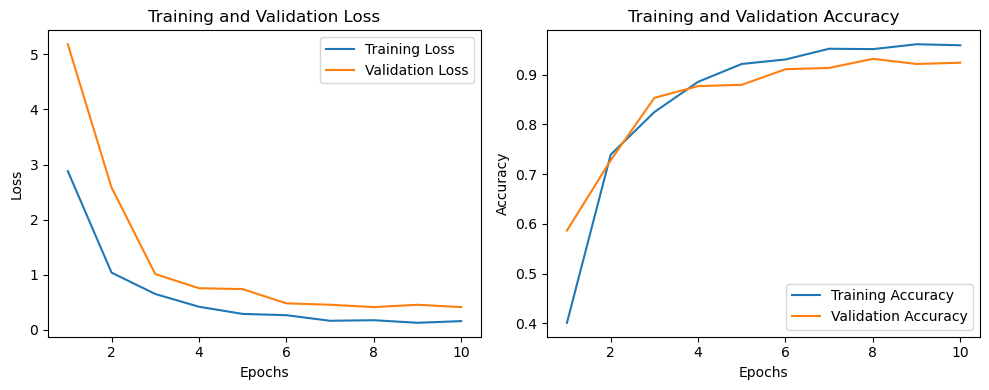

In [170]:
epochs = range(1, len(training_losses) + 1)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_losses, label='Training Loss')
plt.plot(epochs, validation_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracies, label='Training Accuracy')
plt.plot(epochs, validation_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [118]:
print(len(X_train))


3190


In [119]:
print(len(X_test))

1994


In [128]:
y_pred = modified_lenet_model.predict(X_test)

63/63 [==============================] - 4s 66ms/step


In [77]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [121]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

Sum of predicted values for each class: [162   8  38   0   0   0 226   4   0 158   0  20   0   0   0   0   0   0
   0  22   0  32   0   4   0   0  38   0   0   0   0   0   0  26  20   0
   4  40   0   2   0   0   0   0   4   8   0   0   2 288   0 758 130   0
   0]
Sum of actual values for each class: [ 14  12  60  84  58  50  30  50  14   0  60 130  22  92  12  36  76  84
   2  12   8  10  26   2 134  24  68  26  34  18   2   8  46  12  26  40
  30   8   8  18 116  24   2  14  10   6  42  20   4  30   2 176  58  40
   4]


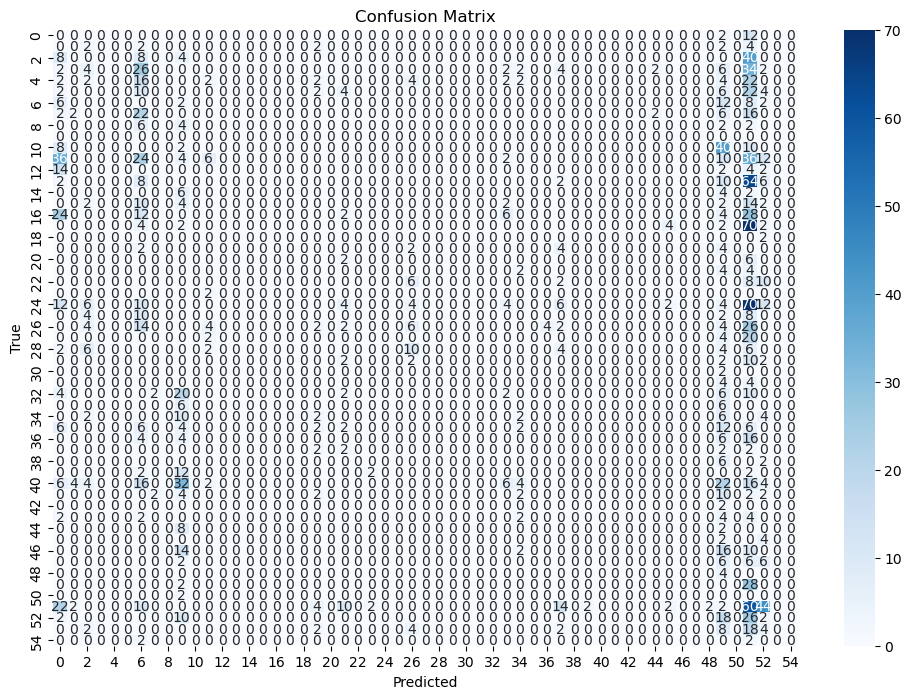

In [122]:
import seaborn as sns

predictLabel = []
predicted_labels = np.argmax(y_pred, axis=1)

for number in predicted_labels:
  # Convert the numpy array to a string with space-separated numbers
    predicted_string = ' '.join(map(str, predicted_labels))
    # Split the string by space and store each number in an array
    predictLabel = predicted_string.split()
    padded_Label = [f'{int(item):03}' for item in predictLabel]

confusion = confusion_matrix(y_label, padded_Label)


# Calculate the sum of predicted and actual values for each category
sum_predicted = np.sum(confusion, axis=0)  # Sum of predicted values for each class
sum_actual = np.sum(confusion, axis=1)  # Sum of actual values for each class

# Print the sum of predicted and actual values for each category
print("Sum of predicted values for each class:", sum_predicted)
print("Sum of actual values for each class:", sum_actual)

plt.figure(figsize=(12,8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [124]:
labels = y_label  # Replace with your actual array

# Find the unique classes or labels
unique_label_classes = np.unique(labels)

# Get the number of unique classes
num_classes = len(unique_label_classes)

print(num_classes)


54


In [85]:
print(classification_report(y_label, padded_Label))

              precision    recall  f1-score   support

         000       0.50      0.86      0.63        14
         001       0.67      0.67      0.67        12
         002       0.67      0.47      0.55        60
         003       1.00      0.57      0.73        84
         004       0.79      0.66      0.72        58
         005       0.53      0.64      0.58        50
         006       0.50      0.87      0.63        30
         007       1.00      0.28      0.44        50
         008       0.54      1.00      0.70        14
         009       0.00      0.00      0.00         0
         010       0.78      0.93      0.85        60
         011       0.94      0.75      0.84       130
         012       0.65      1.00      0.79        22
         013       1.00      0.74      0.85        92
         014       1.00      0.83      0.91        12
         015       0.29      0.44      0.35        36
         016       0.79      0.87      0.82        76
         017       1.00    

C:\Users\richa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\richa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\richa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\richa\anaconda3\lib\site-packages\sklearn\metrics\_cla

Number of unique classes: 54
['000' '001' '002' '003' '004' '005' '006' '007' '008' '010' '011' '012'
 '013' '014' '015' '016' '017' '020' '021' '022' '023' '024' '025' '026'
 '027' '028' '029' '030' '031' '032' '034' '035' '036' '037' '038' '039'
 '040' '041' '042' '043' '044' '045' '046' '047' '048' '049' '050' '051'
 '052' '053' '054' '055' '056' '057']
['000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '000', '001', '001', '001', '001', '001', '001', '001', '001', '001', '001', '001', '001', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '002', '003', '003', '003', '003', '003', '00

In [125]:
strings_only_in_check = set(check) - set(padded_Label)

# Find the strings that are in list2 but not in list1
strings_only_in_padded_Label = set(padded_Label) - set(check)

# Combine the results to get the strings that are not in both lists
strings_not_in_both = strings_only_in_check.union(strings_only_in_padded_Label)

# Convert the result back to a list if needed
result_list = list(strings_not_in_both)

# Print the result
print(strings_only_in_check) # In Testing set
print(strings_only_in_padded_Label) # In predicted set
print(result_list)

# From the confusion matrix and classification report, this indicates and proofs that which category is not inside the testing dataset.

{'012', '053', '035', '013', '029', '057', '031', '008', '046', '003', '050', '015', '005', '019', '044', '018', '026', '045', '004', '030', '043', '034', '056', '016', '017', '033', '041', '022', '020', '024', '032', '014', '038', '049', '010', '027'}
set()
['012', '053', '035', '013', '029', '057', '031', '008', '046', '003', '050', '015', '005', '019', '044', '018', '026', '045', '004', '030', '043', '034', '056', '016', '017', '033', '041', '022', '020', '024', '032', '014', '038', '049', '010', '027']


In [129]:
num_test_images = len(X_name)
random_index = random.randint(0, num_test_images - 1)
random_test_image = X_name[random_index]

 

img_path = random_test_image  
img = cv.imread(img_path)  
imgdisplay = img
img = np.expand_dims(img, axis=0)

 

# Make predictions
predictions = modified_lenet_model.predict(img)

 

# Find the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)

 

# Map the predicted class to a label using your category dictionary

 

predicted_class_str = str(predicted_class[0])
predicted_class_str = str(predicted_class_str).zfill(3)
print(predicted_class_str)

 

predicted_description = category.get(predicted_class_str)

 

    
# Display or use the predicted label

 

plt.figure(figsize=(12,8))
plt.imshow(imgdisplay)

 

print("Predicted Class:", predicted_description)

1/1 [==============================] - 0s 19ms/step
054


AttributeError: 'str' object has no attribute 'get'